# Computer Infrastructure - Tasks Notebook

This notebook summarizes my work on the tasks portion of the assessment for the module Computer Infrastructure.

*by Eoghan Walsh*

## Task 1: Create Directory Structure

I used the following bash commands on the command line to create a directory named ``data`` and two subdirectories ``timestamps`` and ``weather`` at the root of my ``comp_infra-assessment`` repository:
```sh
   mkdir -p data/timestamps
   mkdir -p data/weather
```
The ``mkdir`` command creates the directories, if they do not already exist. The ``-p`` argument will make the parent directory as needed, and not throw up an error if existing.

## Task 2: Timestamps

I navigated to the ``data/timestamps`` directory from the root of my repository using following command:
```bash
   cd data/timestamps/
```
I then used following bash command to append the current date and time to a file named `now.txt`:
```sh
   date >> now.txt
```
``date`` outputs the current date and time and ``>>`` appends the output to the file. The file will be created if it doesn't exist.

I executed the ``date >> now.txt`` command a total of ten times and then used the ``more`` commmand to display the contents of the file `now.txt` in the terminal:
```sh
   more now.txt
```
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;*terminal output:*
```output
   Wed Oct 16 20:09:59 IST 2024
   Wed Oct 16 20:10:01 IST 2024
   Wed Oct 16 20:10:02 IST 2024
   Wed Oct 16 20:10:04 IST 2024
   Wed Oct 16 20:10:05 IST 2024
   Wed Oct 16 20:10:06 IST 2024
   Wed Oct 16 20:10:07 IST 2024
   Wed Oct 16 20:10:08 IST 2024
   Wed Oct 16 20:10:17 IST 2024
   Wed Oct 16 20:10:18 IST 2024
```

## Task 3: Formatting Timestamps

I used the ``date --help`` command to view the formatting options available. Below is a selection of some of the interpreted sequences.
```output
   %d   day of month (e.g., 01)
   %H   hour (00..23)
   %m   month (01..12)
   %M   minute (00..59)
   %S   second (00..60)
   %Y   year
```

I then used the following bash command to append the current date and time to a file named ``formatted.txt`` in the format ``YYYYmmdd_HHMMSS``:
```sh
   date +"%Y%m%d_%H%M%S" >> formatted.txt
```
I used the ``more`` command to view the contents of the file and ensure the date was in the desired format.
```sh
   more formatted.txt
```
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;*terminal output:*
```output
   20241016_210537
```

## Task 4: Create Timestamped Files

I used the following bash command to create an empty file with the name in the ``YYYYmmdd_HHMMSS.txt`` format:
```sh
   touch `date +"%Y%m%d_%H%M%S.txt"`
```
The ``touch`` command updates the modification time of a file to the current time but will also create a file that does not exist.

## Task 5: Download Today's Weather Data

I navigated from the ``data/timestamps`` directory to the ``data/weather`` directory using following command:
```sh
   cd ../weather/
```
I used the following bash command to download weather data for the Athenry weather station from this Met Eireann URL: ``https://prodapi.metweb.ie/observations/athenry/today`` and save the file as ``weather.json``.
```sh
   wget -O weather.json https://prodapi.metweb.ie/observations/athenry/today
```
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;*terminal output:*
```output
   --2024-10-29 18:58:34--  https://prodapi.metweb.ie/observations/athenry/today
   Resolving prodapi.metweb.ie (prodapi.metweb.ie)... 139.162.185.91
   Connecting to prodapi.metweb.ie (prodapi.metweb.ie)|139.162.185.91|:443... connected.
   HTTP request sent, awaiting response... 200 OK
   Length: unspecified [application/json]
   Saving to: ‘weather.json’

   weather.json       [ <=>        ]   5.62K  --.-KB/s    in 0s

   2024-10-29 18:58:41 (343 MB/s) - ‘weather.json’ saved [5757]
```
The ``wget`` command retrieves the data from the URL and the ``-O`` argument writes the data to the file ``weather.json``.

## Task 6: Timestamp the Data

I used the following bash command to download weather data for the Athenry weather station from the Met Eireann URL and save the file with a timestamped name in the format ``YYYYmmdd_HHMMSS.json``.

```sh
   wget -O `date +"%Y%m%d_%H%M%S.json"` https://prodapi.metweb.ie/observations/athenry/today
```
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;*terminal output:*
```output
   --2024-10-29 19:06:17--  https://prodapi.metweb.ie/observations/athenry/today
   Resolving prodapi.metweb.ie (prodapi.metweb.ie)... 139.162.185.91
   Connecting to prodapi.metweb.ie (prodapi.metweb.ie)|139.162.185.91|:443... connected.
   HTTP request sent, awaiting response... 200 OK
   Length: unspecified [application/json]
   Saving to: ‘20241029_190617.json’

   20241029_190617.json     [ <=>         ]   5.62K  --.-KB/s    in 0s

   2024-10-29 19:06:18 (33.4 MB/s) - ‘20241029_190617.json’ saved [5757]
```

## Task 7: Write the Script

I navigated from the ``data/weather`` back to the root of my repository using the ``cd ../../`` command and then I used the ``touch`` command to create an empty file named ``weather.sh``.
```sh
   touch weather.sh
```
I copied the following bash command into ``weather.sh``:
```sh
   #! /bin/bash

   wget -O data/weather/`date +"%Y%m%d_%H%M%S.json"` https://prodapi.metweb.ie/observations/athenry/today
```
The ``#! /bin/bash`` is know as the shebang and is added to the beginning of the script to instruct the operating system to use Bash as the default shell to run the script, as explained per [geeksforgeeks.org]("https://www.geeksforgeeks.org/shell-scripting-define-bin-bash/")

Before running the bash script, I had to check if the ``weather.sh`` file is executable.

I used the ``ls -l`` command to view the permissions of the file.
```sh
   ls -l weather.sh
```
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;*terminal output:*
```output
   -rwxrwxrwx 1 ewalsh ewalsh 116 Nov 27 20:46 weather.sh
```
The first column of the above output shows the permissions of the file and if this has the ``x`` permission, it is executable.

If the file does not have the ``x`` permission the following bash command can be used to make the file executable:
```bash
   chmod +x weather.sh
```

Once I knew the ``weather.sh`` file had the ``x`` permission, I used the following bash command to execute the bash script:
```sh
   ./weather.sh
```
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;*terminal output:*
```output
   --2024-11-13 19:06:14--  https://prodapi.metweb.ie/observations/athenry/today
   Resolving prodapi.metweb.ie (prodapi.metweb.ie)... 139.162.185.91
   Connecting to prodapi.metweb.ie (prodapi.metweb.ie)|139.162.185.91|:443... connected.
   HTTP request sent, awaiting response... 200 OK
   Length: unspecified [application/json]
   Saving to: ‘data/weather/20241113_190614.json’

   data/weather/20241113_190614.json    [ <=>            ]   5.54K  --.-KB/s    in 0s

   2024-11-13 19:06:15 (471 MB/s) - ‘data/weather/20241113_190614.json’ saved [5673]
```


When executed, the ``weather.sh`` bash script downloads the weather data from the URL and saves the file with a timestamped name to the ``data/weather`` directory.

## Task 8: Notebook

I used the following bash command to create this notebook in the root of my ``comp_infra-assessment`` repository:

```sh
   touch weather.ipynb
```

## Task 9: pandas

The following analysis is on weather data for Athenry, Co. Galway on October 29th 2024. The data was obtained from [data.gov.ie](https://data.gov.ie/dataset/todays-weather-athenry) on October 29th at 7:06pm and contains hourly observations from 12:00am to 6:00pm. The values for each hour, per [data.gov.ie](https://data.gov.ie/dataset/todays-weather-athenry), include: Name; Dry bulb temperature in whole degrees; Weather description, Windspeed (kt); Cardinal Wind Direction; Relative Humidity (%); Rainfall (mm); msl Pressure (mbar); Day of the week; Date; Time of observation.

In [112]:
# Import the modules.
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import AutoMinorLocator

In [113]:
# Import the weather data to a pandas dataframe.
json_file = "./data/weather/20241029_190617.json"
df = pd.read_json(json_file)

In [114]:
# Let's take a look at the data.
df

,name,temperature,symbol,weatherDescription,text,windSpeed,windGust,cardinalWindDirection,windDirection,humidity,rainfall,pressure,dayName,date,reportTime
0,Athenry,10,15n,Fog / Mist,"""Mist""",4,-,W,270,97,0.0,1023,Tuesday,2024-10-29,00:00
1,Athenry,9,15n,Fog / Mist,"""Fog thickening""",4,-,SW,225,97,0.0,1024,Tuesday,2024-10-29,01:00
2,Athenry,9,15n,Fog / Mist,"""Fog thickening""",2,-,W,270,99,0.0,1024,Tuesday,2024-10-29,02:00
3,Athenry,9,15n,Fog / Mist,"""Fog thinning""",4,-,SW,225,99,0.0,1024,Tuesday,2024-10-29,03:00
4,Athenry,9,15n,Fog / Mist,"""Fog thickening""",6,-,SW,225,99,0.1,1024,Tuesday,2024-10-29,04:00
5,Athenry,8,15n,Fog / Mist,"""Fog thinning""",-,-,,0,98,0.0,1025,Tuesday,2024-10-29,05:00
6,Athenry,6,15n,Fog / Mist,"""Fog thickening""",-,-,,0,98,0.0,1025,Tuesday,2024-10-29,06:00
7,Athenry,7,15n,Fog / Mist,"""Fog""",2,-,SW,225,99,0.0,1025,Tuesday,2024-10-29,07:00
8,Athenry,7,15d,Fog / Mist,"""Fog thinning""",-,-,,0,97,0.1,1026,Tuesday,2024-10-29,08:00
9,Athenry,9,15d,Fog / Mist,"""Fog""",2,-,S,180,98,0.0,1026,Tuesday,2024-10-29,09:00


In [115]:
# Let's check the dtypes of the columns.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   name                   19 non-null     object        
 1   temperature            19 non-null     int64         
 2   symbol                 19 non-null     object        
 3   weatherDescription     19 non-null     object        
 4   text                   19 non-null     object        
 5   windSpeed              19 non-null     object        
 6   windGust               19 non-null     object        
 7   cardinalWindDirection  19 non-null     object        
 8   windDirection          19 non-null     int64         
 9   humidity               19 non-null     int64         
 10  rainfall               19 non-null     float64       
 11  pressure               19 non-null     int64         
 12  dayName                19 non-null     object        
 13  date   

In [116]:
# Let's update the windSpeed to numeric dype and replace any NaN with 0.
# Ref: https://pandas.pydata.org/docs/reference/api/pandas.to_numeric.html#pandas-to-numeric
# Ref: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html#pandas-dataframe-fillna
df["windSpeed"] = pd.to_numeric(df["windSpeed"], errors="coerce").fillna(value=0)

In [117]:
# Let's combine the date and reportTime columns into one new column called dateTime.
# Ref: https://www.statology.org/pandas-combine-date-and-time-columns/
df["dateTime"] = pd.to_datetime(df["date"].astype(str) + df["reportTime"], format="%Y-%m-%d%H:%M")

Text(0   2024-10-29
Name: dateTime, dtype: datetime64[ns], 12.5, 'max temp: 14 C\nmin temp: 6 C\nmean temp: 10.21 C')

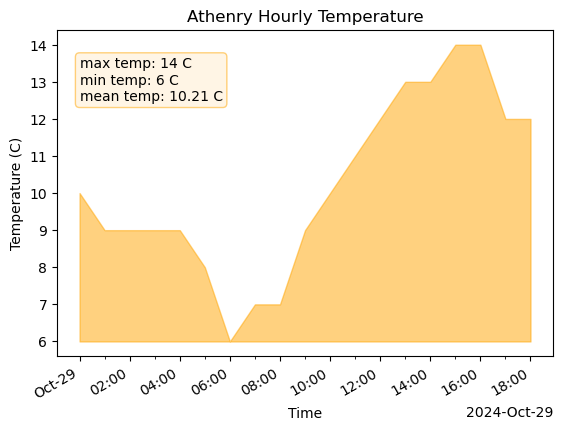

In [140]:
# Let's plot the temperature.
fig, ax = plt.subplots()

# x variable.
time = df["dateTime"]
# y variable.
temp = df["temperature"]

# Format the datetime x axis.
# Ref: https://matplotlib.org/stable/api/dates_api.html#matplotlib.dates.ConciseDateFormatter
# Ref: https://matplotlib.org/stable/gallery/showcase/anatomy.html#anatomy-of-a-figure
# Ref: https://matplotlib.org/stable/api/_as_gen/matplotlib.figure.Figure.autofmt_xdate.html#matplotlib-figure-figure-autofmt-xdate
locator = mdates.AutoDateLocator() 
formatter = mdates.ConciseDateFormatter(locator)
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_minor_locator(AutoMinorLocator(2))
fig.autofmt_xdate()

# Set title, axis labels and legend.
ax.set_title("Athenry Hourly Temperature")
ax.set_xlabel("Time")
ax.set_ylabel("Temperature (C)")

# Plot.
# Ref: https://matplotlib.org/stable/gallery/lines_bars_and_markers/fill_between_alpha.html#fill-between-and-alpha
ax.fill_between(time, temp.min(), temp, color="orange", alpha=0.5)

# Add text box for descriptive stats.
# Ref: https://matplotlib.org/stable/gallery/specialty_plots/anscombe.html#anscombe-s-quartet
text=(f"max temp: {temp.max()} C\n"
      f"min temp: {temp.min()} C\n"
      f"mean temp: {temp.mean():.2f} C")
bbox = dict(boxstyle="round", fc=("orange", 0.1), ec=("orange", 0.5))
x_loc = df["dateTime"].iloc[:1]
y_loc = 12.5
ax.text(x_loc, y_loc, text, bbox=bbox)

Text(0   2024-10-29
Name: dateTime, dtype: datetime64[ns], 7, 'max windspeed: 9 kt\nmin windspeed: 0 kt\nmean windspeed: 4.11 kt')

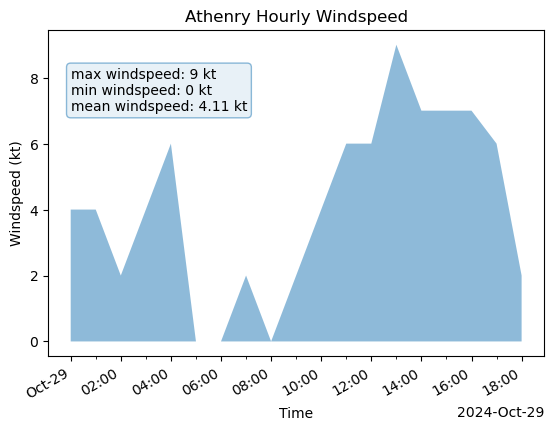

In [139]:
# Let's plot the windspeed.
fig, ax = plt.subplots()

# x variable.
time = df["dateTime"]
# y variable.
wind = df["windSpeed"]

# Format the datetime x axis.
locator = mdates.AutoDateLocator() 
formatter = mdates.ConciseDateFormatter(locator)
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_minor_locator(AutoMinorLocator(2))
fig.autofmt_xdate()

# Set title and axis labels.
ax.set_title("Athenry Hourly Windspeed")
ax.set_xlabel("Time")
ax.set_ylabel("Windspeed (kt)")

# Plot.
ax.fill_between(time, wind.min(), wind, alpha=0.5)

# Add text box for descriptive stats.
text=(f"max windspeed: {wind.max():.0f} kt\n"
      f"min windspeed: {wind.min():.0f} kt\n"
      f"mean windspeed: {wind.mean():.2f} kt")
bbox = dict(boxstyle='round', fc=("tab:blue", 0.1), ec=("tab:blue", 0.5))
x_loc = df["dateTime"].iloc[:1]
y_loc = 7
ax.text(x_loc, y_loc, text, bbox=bbox)

***

## End